<a href="https://colab.research.google.com/github/anujsingh0308/dscode/blob/master/EDA_on_US_Accidents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis Project on US Accidents

Todo1- talk about EDA. 

Todo2- talk about dataset(source, what it contains,
how it will be useful)

-kaggle

-information about accidents

-useful to prevent accidents**

In [1]:
# pip install opendatasets --upgrade --quiet

In [2]:
# import opendatasets as od
# download_url='https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents'
# od.download(download_url, force=True)


In [3]:
# data_filename="./us-accidents/US_Accidents_March23.csv"

In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/us-accidents/US_Accidents_March23.csv


**This is a countrywide car accident dataset that covers 49 states of the USA. The accident data were collected from February 2016 to March 2023, using multiple APIs that provide streaming traffic incident (or event) data. These APIs broadcast traffic data captured by various entities, including the US and state departments of transportation, law enforcement agencies, traffic cameras, and traffic sensors within the road networks. The dataset currently contains approximately 7.7 million accident records.**

# Data Preparation and Cleaning
Steps:

1.Load the file using Pandas.

2.Look out for the information about the columns and their data.

3.Perform the correction of any noisy data if any.



In [5]:
import pandas as pd

In [6]:
df=pd.read_csv("/kaggle/input/us-accidents/US_Accidents_March23.csv")

In [7]:
df

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.010,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.010,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,A-7777757,Source1,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.99888,-117.37094,0.543,...,False,False,False,False,False,False,Day,Day,Day,Day
7728390,A-7777758,Source1,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.76555,-117.15363,0.338,...,False,False,False,False,False,False,Day,Day,Day,Day
7728391,A-7777759,Source1,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.77740,-117.85727,0.561,...,False,False,False,False,False,False,Day,Day,Day,Day
7728392,A-7777760,Source1,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.98311,-118.39565,0.772,...,False,False,False,False,False,False,Day,Day,Day,Day


In [8]:
df.shape

(7728394, 46)

In [9]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [11]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


In [12]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)

13

In [13]:
df.isnull().sum().sort_values(ascending = False)

End_Lat                  3402762
End_Lng                  3402762
Precipitation(in)        2203586
Wind_Chill(F)            1999019
Wind_Speed(mph)           571233
Visibility(mi)            177098
Wind_Direction            175206
Humidity(%)               174144
Weather_Condition         173459
Temperature(F)            163853
Pressure(in)              140679
Weather_Timestamp         120228
Nautical_Twilight          23246
Civil_Twilight             23246
Sunrise_Sunset             23246
Astronomical_Twilight      23246
Airport_Code               22635
Street                     10869
Timezone                    7808
Zipcode                     1915
City                         253
Description                    5
Traffic_Signal                 0
Roundabout                     0
Station                        0
Stop                           0
Traffic_Calming                0
Country                        0
Turning_Loop                   0
No_Exit                        0
End_Time  

**Percentage of missing values per column**

In [14]:
missing_percentages = df.isnull().sum().sort_values(ascending=False)*100 / len(df)
missing_percentages

End_Lat                  44.029355
End_Lng                  44.029355
Precipitation(in)        28.512858
Wind_Chill(F)            25.865904
Wind_Speed(mph)           7.391355
Visibility(mi)            2.291524
Wind_Direction            2.267043
Humidity(%)               2.253301
Weather_Condition         2.244438
Temperature(F)            2.120143
Pressure(in)              1.820288
Weather_Timestamp         1.555666
Nautical_Twilight         0.300787
Civil_Twilight            0.300787
Sunrise_Sunset            0.300787
Astronomical_Twilight     0.300787
Airport_Code              0.292881
Street                    0.140637
Timezone                  0.101030
Zipcode                   0.024779
City                      0.003274
Description               0.000065
Traffic_Signal            0.000000
Roundabout                0.000000
Station                   0.000000
Stop                      0.000000
Traffic_Calming           0.000000
Country                   0.000000
Turning_Loop        

<Axes: >

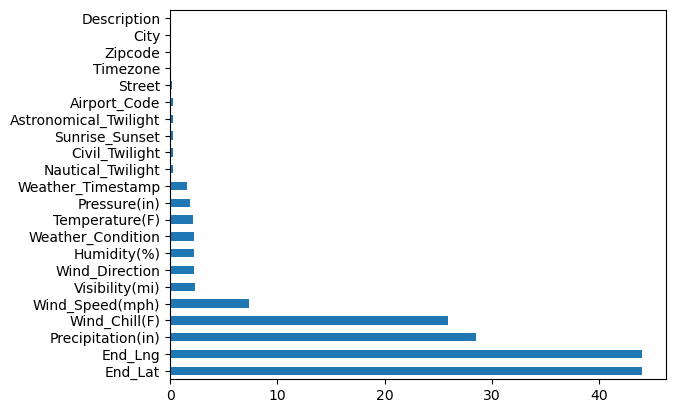

In [15]:
missing_percentages[missing_percentages!=0].plot(kind='barh')

## **Exploratory Analysis and Visualization**

We will analyze the following columns:

1. City
2. Start time
3. Start Lat, Start Lng
4. Temperature
5. Weather Condition


### **1. City**

In [16]:
df.City

0                Dayton
1          Reynoldsburg
2          Williamsburg
3                Dayton
4                Dayton
               ...     
7728389       Riverside
7728390       San Diego
7728391          Orange
7728392     Culver City
7728393        Highland
Name: City, Length: 7728394, dtype: object

In [17]:
cities= df.City.unique()
len(cities)

13679

In [18]:
cities_by_accidents=df.City.value_counts()
cities_by_accidents

Miami                           186917
Houston                         169609
Los Angeles                     156491
Charlotte                       138652
Dallas                          130939
                                 ...  
Benkelman                            1
Old Appleton                         1
Wildrose                             1
Mc Nabb                              1
American Fork-Pleasant Grove         1
Name: City, Length: 13678, dtype: int64

In [19]:
cities_by_accidents[:20]

Miami            186917
Houston          169609
Los Angeles      156491
Charlotte        138652
Dallas           130939
Orlando          109733
Austin            97359
Raleigh           86079
Nashville         72930
Baton Rouge       71588
Atlanta           68186
Sacramento        66264
San Diego         55504
Phoenix           53974
Minneapolis       51488
Richmond          48845
Oklahoma City     46092
Jacksonville      42447
Tucson            39304
Columbia          38178
Name: City, dtype: int64

<Axes: >

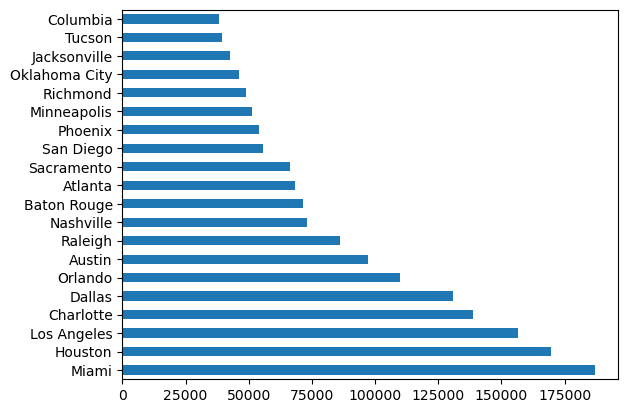

In [20]:
cities_by_accidents[:20].plot(kind="barh")

In [21]:
import seaborn as sns
import plotly.graph_objects as go
sns.set_style('darkgrid')

<Axes: xlabel='City', ylabel='Count'>

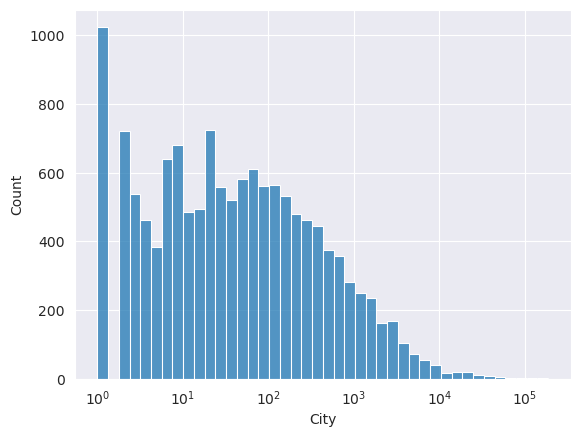

In [22]:
sns.histplot(cities_by_accidents, log_scale=True)

In [23]:
print("State Code: ", df.State.unique())
print("Total No. of State: ", len(df.State.unique()))

State Code:  ['OH' 'WV' 'CA' 'FL' 'GA' 'SC' 'NE' 'IA' 'IL' 'MO' 'WI' 'IN' 'MI' 'NJ'
 'NY' 'CT' 'MA' 'RI' 'NH' 'PA' 'KY' 'MD' 'VA' 'DC' 'DE' 'TX' 'WA' 'OR'
 'AL' 'NC' 'AZ' 'TN' 'LA' 'MN' 'CO' 'OK' 'NV' 'UT' 'KS' 'NM' 'AR' 'MS'
 'ME' 'VT' 'WY' 'ID' 'ND' 'MT' 'SD']
Total No. of State:  49


High accident cities are those with number of accidents greater than 1000, where as low accident cities are those cities having number of accidents less than 1000

In [24]:
high_accidentsNo_cities=cities_by_accidents[cities_by_accidents >1000]
low_accidentsNo_cities=cities_by_accidents[cities_by_accidents <1000]

In [25]:
len(high_accidentsNo_cities)/len(cities)

0.08882228233057972

In [26]:
cities_by_accidents[cities_by_accidents==1]

Lake Andes                      1
Catoctin                        1
Duck Hill                       1
Westbrookville                  1
Saint Croix                     1
                               ..
Benkelman                       1
Old Appleton                    1
Wildrose                        1
Mc Nabb                         1
American Fork-Pleasant Grove    1
Name: City, Length: 1023, dtype: int64

Top 5 states with most number of accidents

In [27]:
states = df.State.unique()
len(states)

49

In [28]:
states_by_accident = df.State.value_counts()
states_by_accident[:5]

CA    1741433
FL     880192
TX     582837
SC     382557
NY     347960
Name: State, dtype: int64

Therefore these 5 cities are **California, Florida, Texas, South Carolina, New York**.

### **2. Start Time**

In [29]:
df.Start_Time=pd.to_datetime(df.Start_Time)

In [30]:
df.Start_Time

0         2016-02-08 05:46:00
1         2016-02-08 06:07:59
2         2016-02-08 06:49:27
3         2016-02-08 07:23:34
4         2016-02-08 07:39:07
                  ...        
7728389   2019-08-23 18:03:25
7728390   2019-08-23 19:11:30
7728391   2019-08-23 19:00:21
7728392   2019-08-23 19:00:21
7728393   2019-08-23 18:52:06
Name: Start_Time, Length: 7728394, dtype: datetime64[ns]

In [31]:
df.Start_Time[0]

Timestamp('2016-02-08 05:46:00')

In [32]:

df['Month'] = df['Start_Time'].dt.month
df['Year'] = df['Start_Time'].dt.year
df['Hour'] = df['Start_Time'].dt.hour
df['Weekday'] = df['Start_Time'].dt.weekday
#yearly data subset 
data_2016 = df[df.Start_Time.dt.year == 2016]
data_2017 = df[df.Start_Time.dt.year == 2017]
data_2018 = df[df.Start_Time.dt.year == 2018]
data_2019 = df[df.Start_Time.dt.year == 2019]
data_2020 = df[df.Start_Time.dt.year == 2020]
data_2021 = df[df.Start_Time.dt.year == 2021]


In [33]:
import matplotlib.pyplot as plt

**Year by year increase in accidents**

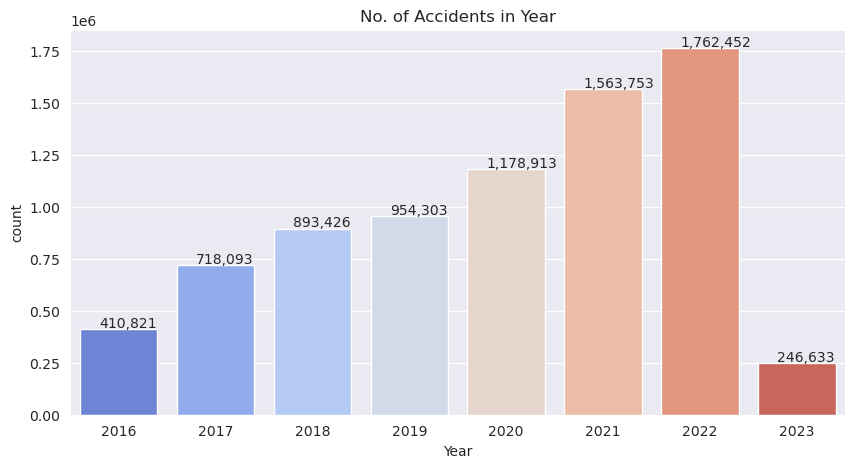

In [34]:
fig, ax = plt.subplots(figsize = (10,5))
cp = sns.countplot(x="Year", data=df, orient = 'v', palette = "coolwarm")
cp.set_title("No. of Accidents in Year")
for i in ax.patches:
    count = '{:,.0f}'.format(i.get_height())
    x = i.get_x()+i.get_width()-0.60
    y = i.get_height()+10000
    ax.annotate(count, (x, y))
plt.show()

**Analysis for months of different years**




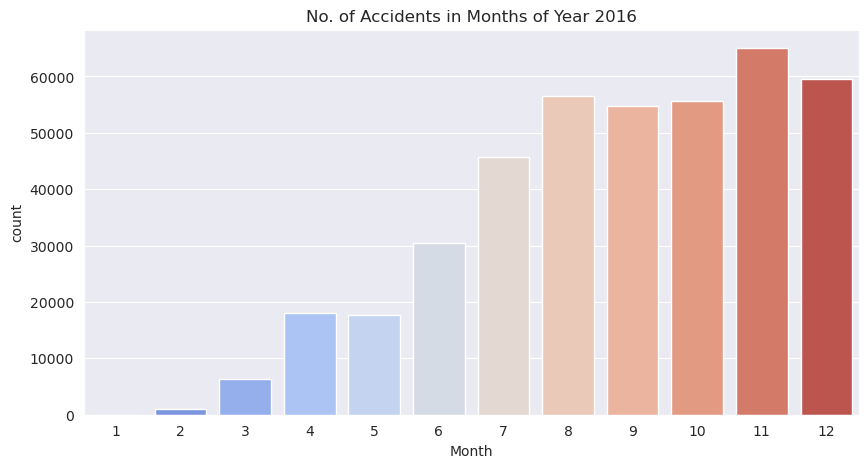

In [35]:
fig, ax = plt.subplots(figsize = (10,5))
cp = sns.countplot(x="Month", data=data_2016, palette = "coolwarm")
cp.set_title("No. of Accidents in Months of Year 2016")
plt.show()

There seems to be no no data about of number of accidents in first month of 2016 . This is an anamoly here. 

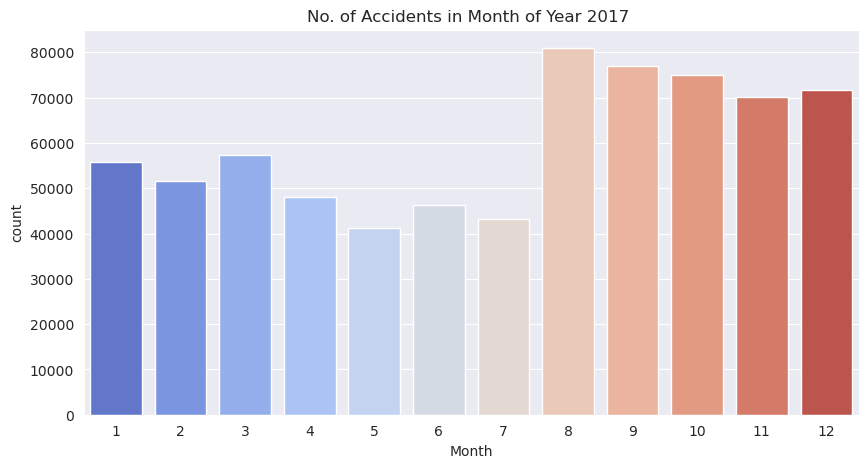

In [36]:
fig, ax = plt.subplots(figsize = (10,5))
cp = sns.countplot(x="Month", data=data_2017, palette = "coolwarm")
cp.set_title("No. of Accidents in Month of Year 2017 ")
plt.show()

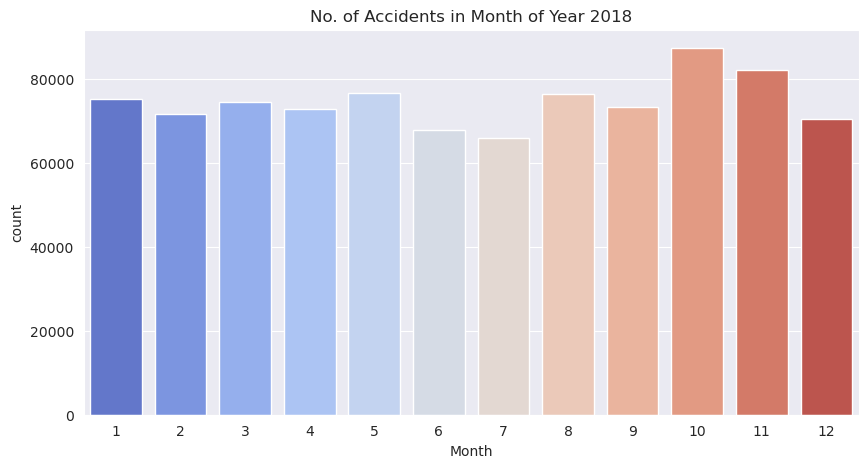

In [37]:
fig, ax = plt.subplots(figsize = (10,5))
cp = sns.countplot(x="Month", data=data_2018, palette = "coolwarm")
cp.set_title("No. of Accidents in Month of Year 2018")
plt.show()

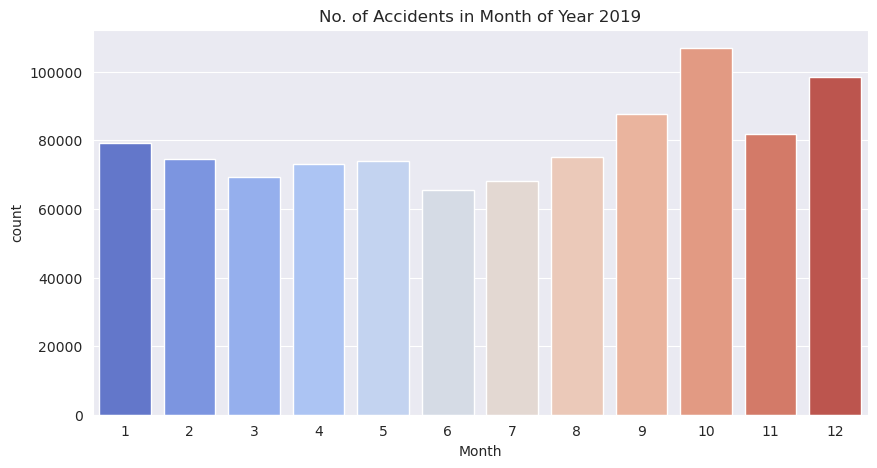

In [38]:
fig, ax = plt.subplots(figsize = (10,5))
cp = sns.countplot(x="Month", data=data_2019, palette = "coolwarm")
cp.set_title("No. of Accidents in Month of Year 2019")
plt.show()

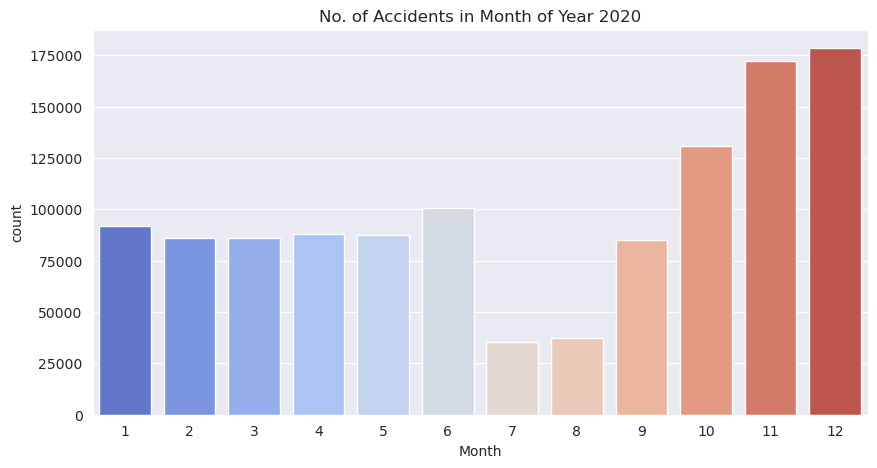

In [39]:
fig, ax = plt.subplots(figsize = (10,5))
cp = sns.countplot(x="Month", data=data_2020, palette = "coolwarm")
cp.set_title("No. of Accidents in Month of Year 2020")
plt.show()

Here also there is no or very less data about number of accidents for the 7th and 8th month that is July and August for the year 2020. This was maybe due to the lockdown or there might be an anamoly in the data.

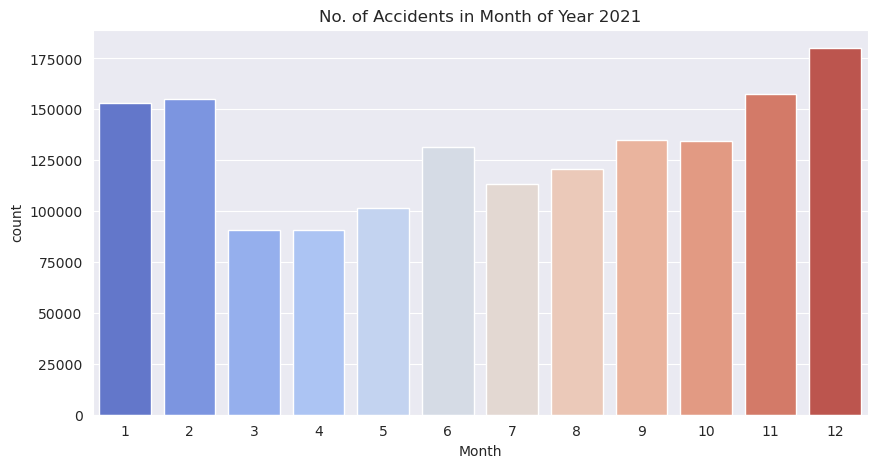

In [40]:
fig, ax = plt.subplots(figsize = (10,5))
cp = sns.countplot(x="Month", data=data_2021, palette = "coolwarm")
cp.set_title("No. of Accidents in Month of Year 2021")
plt.show()

**Weekely analysis of year 2016**

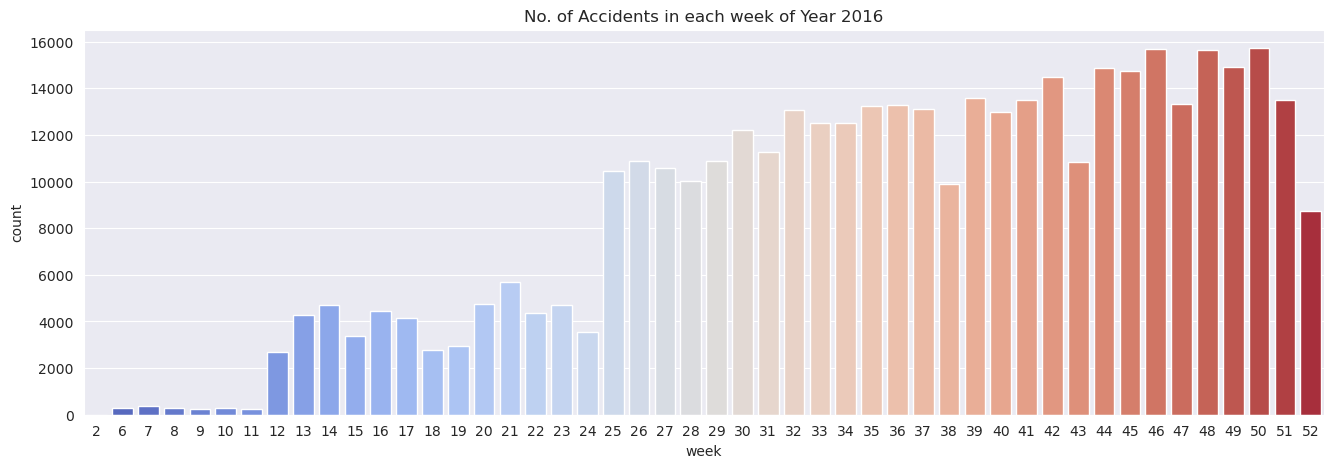

In [41]:
fig, ax = plt.subplots(figsize = (16,5))
cp = sns.countplot(x=data_2016.Start_Time.dt.isocalendar().week, data=data_2016, palette = "coolwarm")
cp.set_title("No. of Accidents in each week of Year 2016")
plt.show()

**and weekly analysis of year 2021**

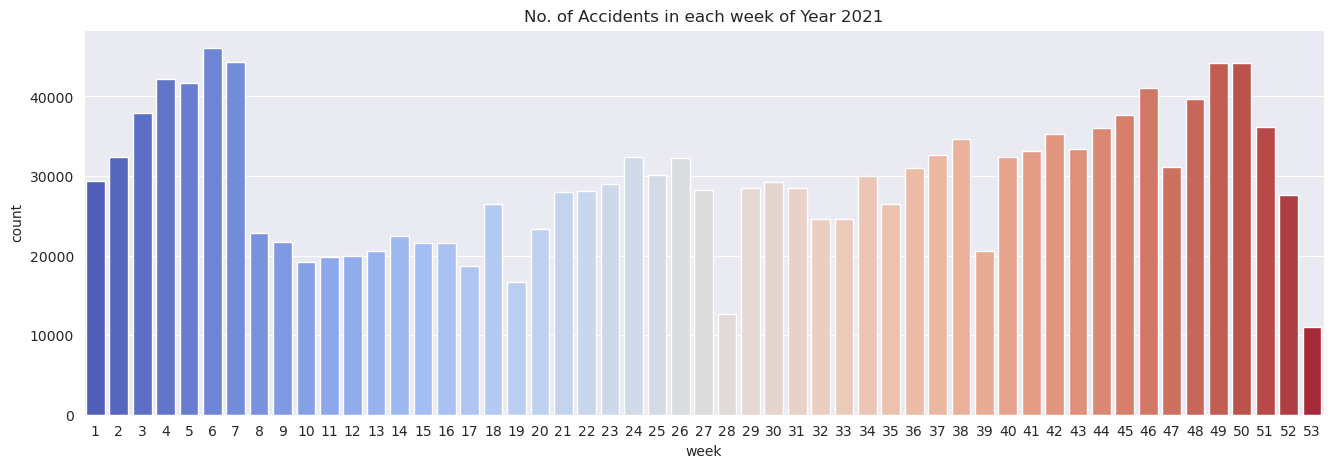

In [42]:
fig, ax = plt.subplots(figsize = (16,5))
cp = sns.countplot(x=data_2021.Start_Time.dt.isocalendar().week, data=data_2021, palette = "coolwarm")
cp.set_title("No. of Accidents in each week of Year 2021")
plt.show()

**analysis of accidents in days of a week**

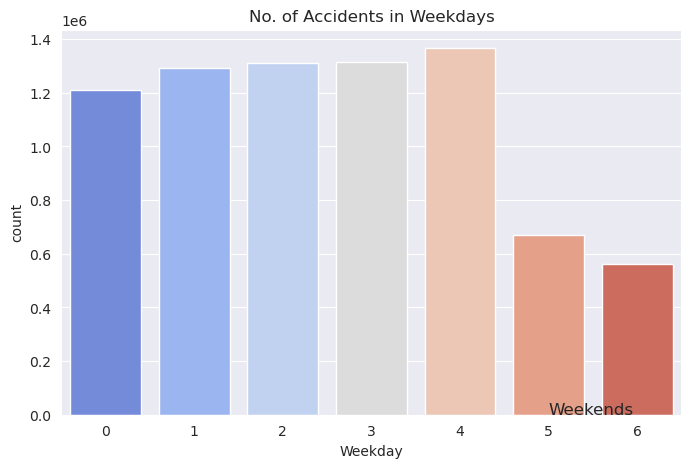

In [43]:
fig, ax = plt.subplots(figsize = (8,5))
cp = sns.countplot(x="Weekday", data=df, palette = "coolwarm")
plt.annotate('Weekends', xy=(5,0), fontsize=12)
cp.set_title("No. of Accidents in Weekdays")
plt.show()

#### There are less number of accidents on weekends as people usually stay at their homes on weekends and relax.

### Hours where most accidents happens



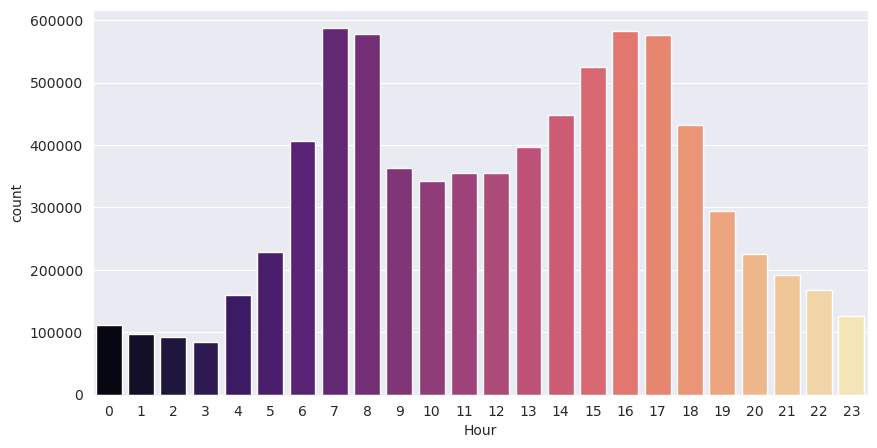

In [44]:
fig, ax = plt.subplots(figsize = (10,5))
sns.countplot(x="Hour", data=df, palette = "magma")
plt.show()

**Most accidents occur between 7am to 8 am and 3pm to 5pm( time people go to office and return from work)**.

### accidents per different hours on sunday(weekend)

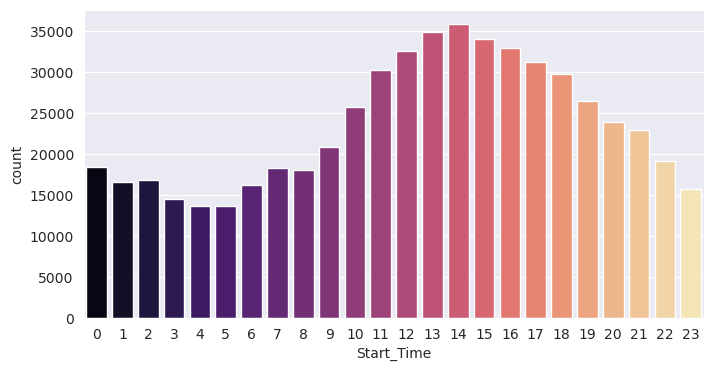

In [45]:
fig, ax = plt.subplots(figsize = (8,4))
sundays=df.Start_Time[df.Start_Time.dt.dayofweek==6]
cp = sns.countplot(x=sundays.dt.hour, data=df, palette = "magma")
plt.show()

### accidents per different hours on monday


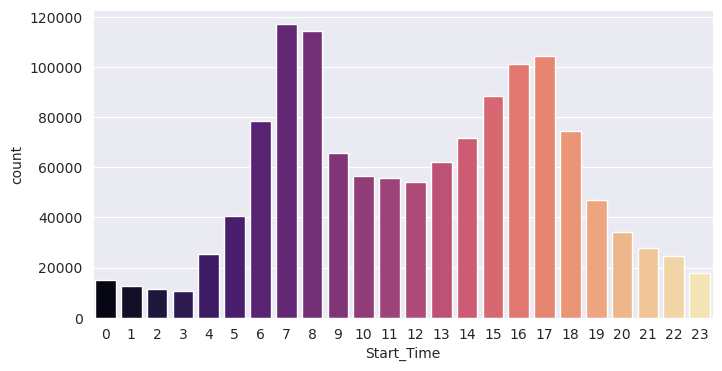

In [46]:
fig, ax = plt.subplots(figsize = (8,4))
mondays=df.Start_Time[df.Start_Time.dt.dayofweek==2]
cp = sns.countplot(x=mondays.dt.hour, data=df, palette = "magma")
plt.show()

#### On sundays(weekends) peak is between 12pm to 4pm, whereas on weekdays like monday peak is between 3pm to 5pm.

### **3. Start Latitude & Longitude**

In [47]:
df.Start_Lat

0          39.865147
1          39.928059
2          39.063148
3          39.747753
4          39.627781
             ...    
7728389    34.002480
7728390    32.766960
7728391    33.775450
7728392    33.992460
7728393    34.133930
Name: Start_Lat, Length: 7728394, dtype: float64

In [48]:
df.Start_Lng

0          -84.058723
1          -82.831184
2          -84.032608
3          -84.205582
4          -84.188354
              ...    
7728389   -117.379360
7728390   -117.148060
7728391   -117.847790
7728392   -118.403020
7728393   -117.230920
Name: Start_Lng, Length: 7728394, dtype: float64

<Axes: xlabel='Start_Lng', ylabel='Start_Lat'>

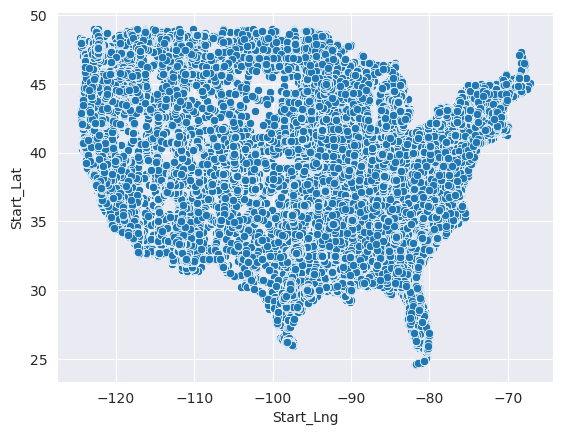

In [49]:
# plotting scatterplot for longitude & lattitude 
sns.scatterplot(x=df.Start_Lng, y= df.Start_Lat)

### **4.Temperature**

**Number of accidents on different temperature values**

In [50]:
df_temp=df.groupby('Temperature(F)')[['ID']].count()
df_temp

,ID
Temperature(F),
-89.0,10
-77.8,11
-58.0,1
-50.0,1
-45.0,1
...,...
174.0,2
189.0,1
196.0,5


In [51]:
df_temp_20 = df_temp.sort_values('ID',ascending=False).head(20)
df_temp_20

,ID
Temperature(F),
77.0,170991
73.0,170898
68.0,163767
72.0,160498
75.0,158448
70.0,155568
63.0,149787
59.0,149017
64.0,148466


<Axes: xlabel='ID', ylabel='Temperature(F)'>

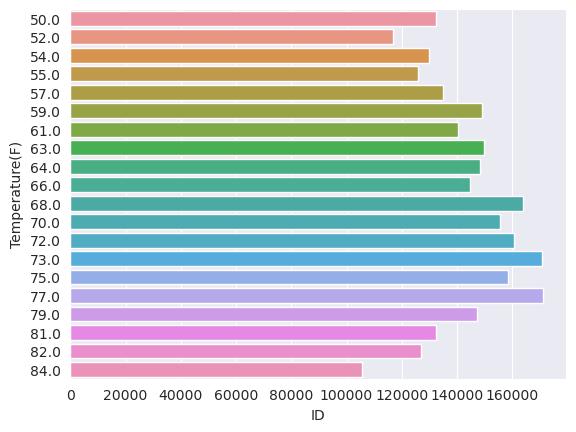

In [52]:
sns.barplot(x='ID', y= df_temp_20.index, data=df_temp_20, orient='h' )

**It is clear after visualization that there is no specific effect of temperature value on number of accidents as we are getting bars with almost same height**

### **5. Weather Conditions**

In [53]:
df.Weather_Condition.unique()

array(['Light Rain', 'Overcast', 'Mostly Cloudy', 'Rain', 'Light Snow',
       'Haze', 'Scattered Clouds', 'Partly Cloudy', 'Clear', 'Snow',
       'Light Freezing Drizzle', 'Light Drizzle', 'Fog', 'Shallow Fog',
       'Heavy Rain', 'Light Freezing Rain', 'Cloudy', 'Drizzle', nan,
       'Light Rain Showers', 'Mist', 'Smoke', 'Patches of Fog',
       'Light Freezing Fog', 'Light Haze', 'Light Thunderstorms and Rain',
       'Thunderstorms and Rain', 'Fair', 'Volcanic Ash', 'Blowing Sand',
       'Blowing Dust / Windy', 'Widespread Dust', 'Fair / Windy',
       'Rain Showers', 'Mostly Cloudy / Windy', 'Light Rain / Windy',
       'Hail', 'Heavy Drizzle', 'Showers in the Vicinity', 'Thunderstorm',
       'Light Rain Shower', 'Light Rain with Thunder',
       'Partly Cloudy / Windy', 'Thunder in the Vicinity', 'T-Storm',
       'Heavy Thunderstorms and Rain', 'Thunder', 'Heavy T-Storm',
       'Funnel Cloud', 'Heavy T-Storm / Windy', 'Blowing Snow',
       'Light Thunderstorms and Snow',

In [54]:
len(df.Weather_Condition.unique())

145

**Top 20 Weather conditions which have most number of accidents**

In [55]:
df_weather = df.groupby('Weather_Condition')[['ID']].count()
df_weather_20 = df_weather.sort_values('ID',ascending=False).head(20)
df_weather_20

,ID
Weather_Condition,
Fair,2560802
Mostly Cloudy,1016195
Cloudy,817082
Clear,808743
Partly Cloudy,698972
Overcast,382866
Light Rain,352957
Scattered Clouds,204829
Light Snow,128680


<Axes: xlabel='ID', ylabel='Weather_Condition'>

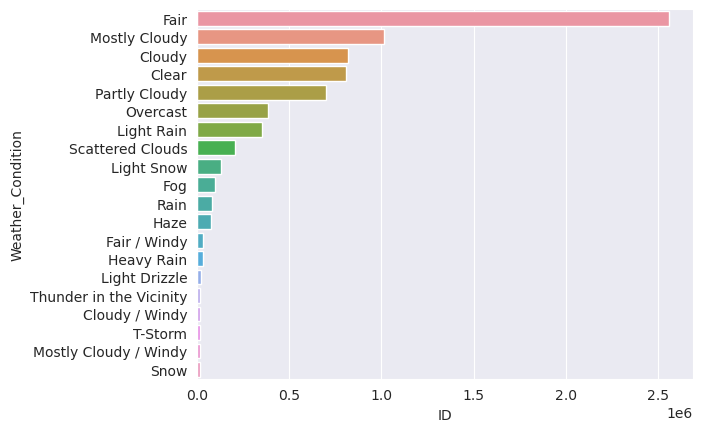

In [56]:
sns.barplot(x='ID', y=df_weather_20.index, data=df_weather_20, orient='h')

# Ask And Answer Questions

1. Are there more accidents in warmer or colder areas?
2. Is there any effect of humidity/ pressure/ visibility/ wind speed on no. of accidents?
3. Which 5 states have the  highest number of accidents?
4. What is the trend of accidents year over year (increasing/decreasing)?
5. Which timezone in US had most accidents?
6. How many accidents happened near to traffic signal?
7. Compare severity of accidents & find how many accidents impacted most on traffic?


### **1. Are there more accidents in warmer or colder areas?**

<Axes: xlabel='ID', ylabel='Temperature(F)'>

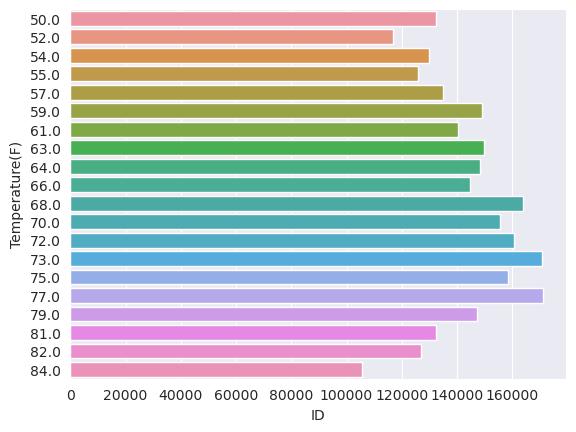

In [57]:
sns.barplot(x='ID', y= df_temp_20.index, data=df_temp_20, orient='h' )

Temperature range has minimal effect on number of accidents occuring.

### **2. Is there any effect of humidity/ pressure/ visibility/ wind speed on no. of accidents?**

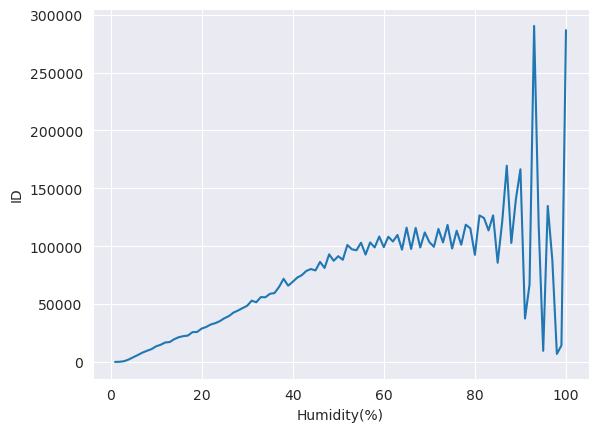

In [58]:
# Effect of Humidity

df_humidity = df.groupby('Humidity(%)')[['ID']].count()
sns.lineplot(x=df_humidity.index, y='ID', data=df_humidity);

It is visible from graph that till 80% humidity there is almost uniform increase but after that there are much more ups and downs in the curve.

<Axes: xlabel='Pressure(in)', ylabel='ID'>

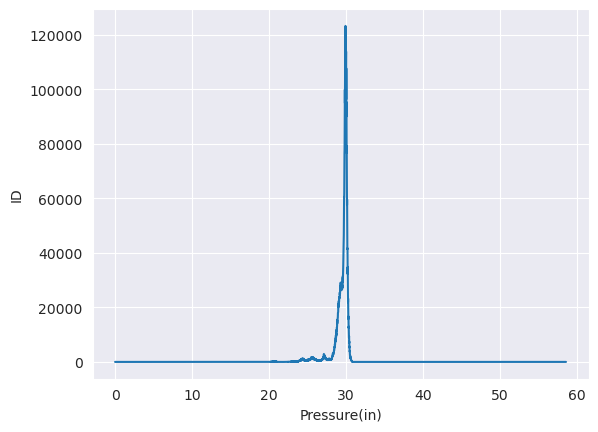

In [59]:
# Effect of Pressure

df_pressure = df.groupby('Pressure(in)')[['ID']].count()
sns.lineplot(x=df_pressure.index, y='ID', data=df_pressure)

So most accidents happens at pressure range 28(in) to 31(in)

In [60]:
# Effect of Visibility


df_visibility = df.groupby('Visibility(mi)')[['ID']].count()
print(df_visibility.sort_values('ID',ascending=False).head(10))


                     ID
Visibility(mi)         
10.0            6070231
7.0              217027
9.0              188529
8.0              149975
5.0              144153
6.0              126586
2.0              121785
4.0              119770
3.0              117493
1.0              102557


<Axes: xlabel='Visibility(mi)', ylabel='ID'>

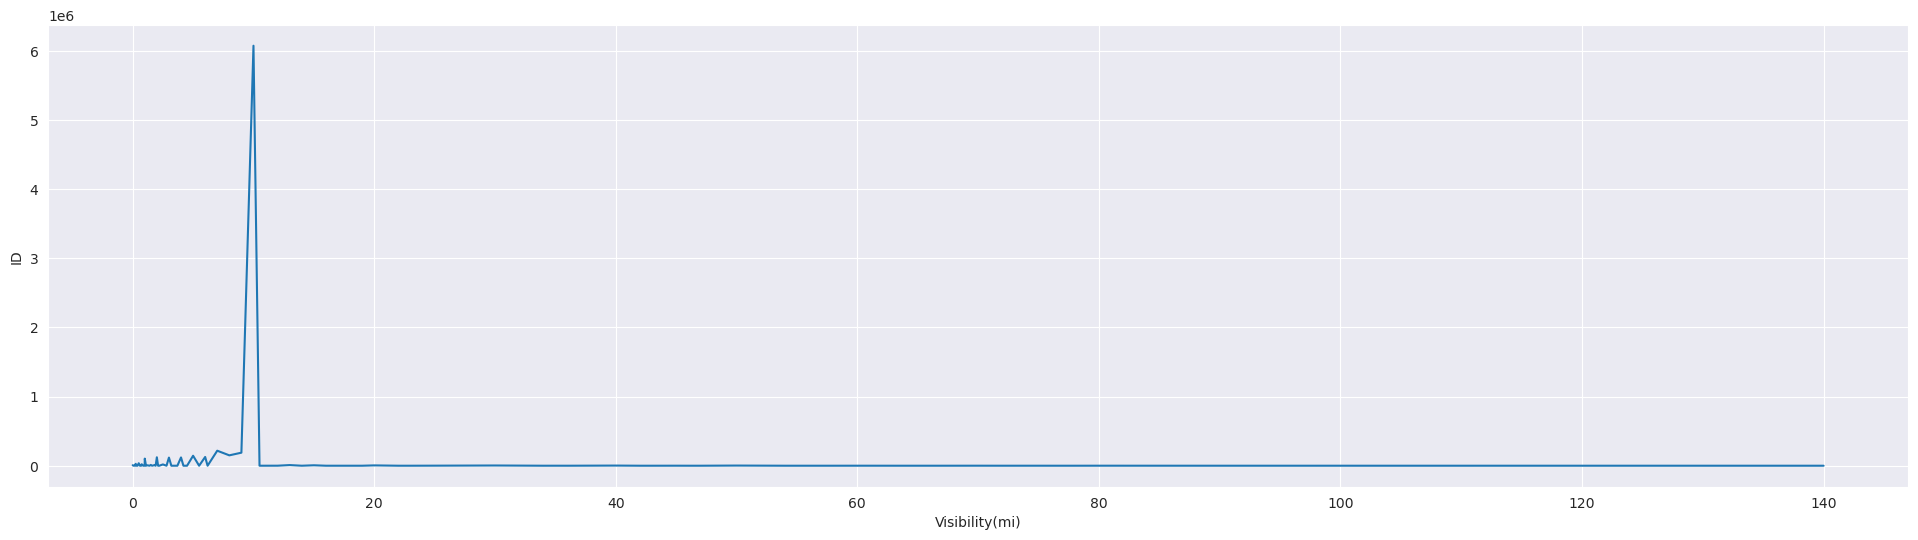

In [61]:
plt.figure(figsize=(24,6))
sns.lineplot(x=df_visibility.index, y='ID', data= df_visibility)

As visibility is given in miles so it is clearly visible that most accidents happens at visibilty of 10 miles.

Accidents number decreases with increase in visibility

In [62]:
# Effect of wind speed

df_wind = df.groupby('Wind_Speed(mph)')[['ID']].count()
print(df_wind.sort_values('ID',ascending=False).head(10))


                     ID
Wind_Speed(mph)        
0.0              961643
5.0              534875
6.0              517199
3.0              514123
7.0              480904
8.0              432522
9.0              389161
10.0             324080
12.0             280269
4.6              217615


<Axes: xlabel='Wind_Speed(mph)', ylabel='ID'>

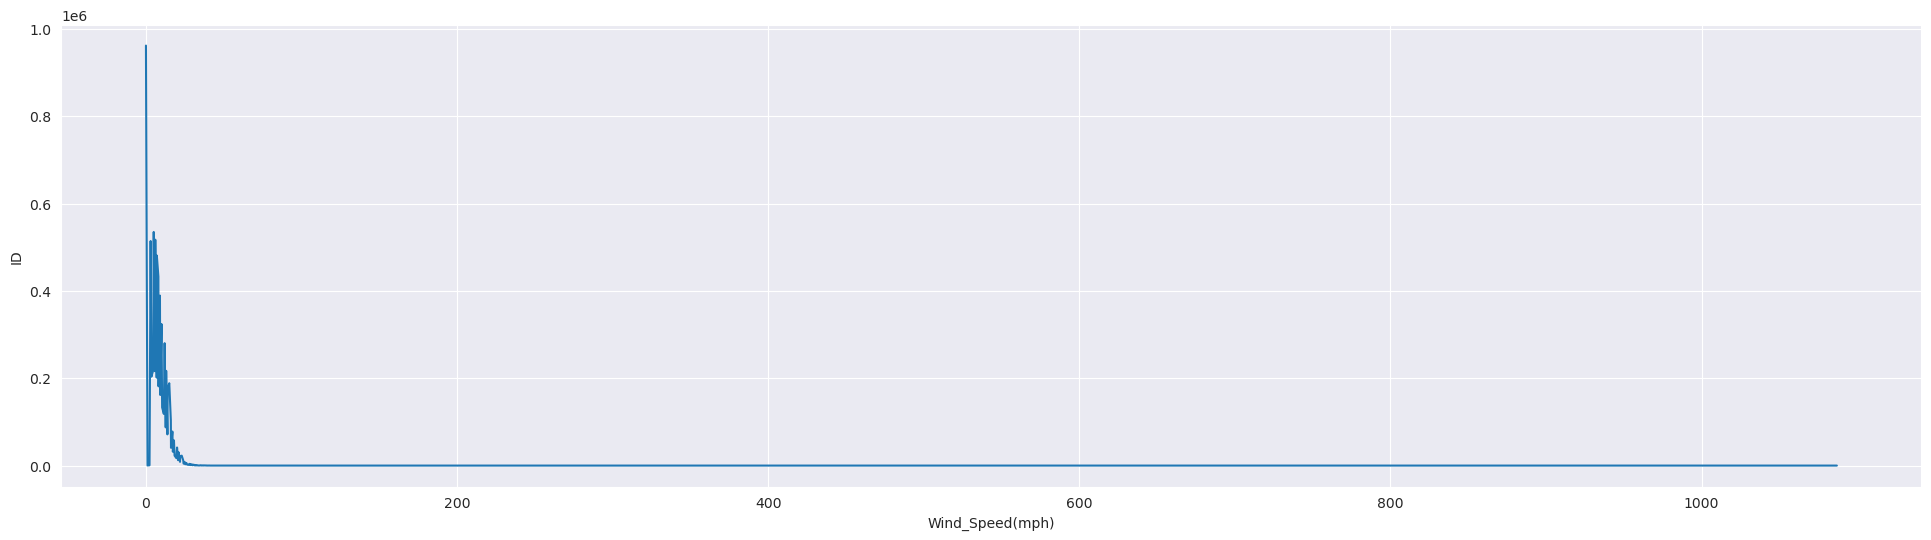

In [63]:
plt.figure(figsize=(24,6))
sns.lineplot(x=df_wind.index, y='ID', data= df_wind)

### **3. Which 5 states have the  highest number of accidents?**

In [64]:
states_by_accident = df.State.value_counts()
states_by_accident[:5]

CA    1741433
FL     880192
TX     582837
SC     382557
NY     347960
Name: State, dtype: int64

Answer is **California, Florida, Texas, South Carolina, New York.**

### **4. What is the trend of accidents year over year (increasing/decreasing)?**

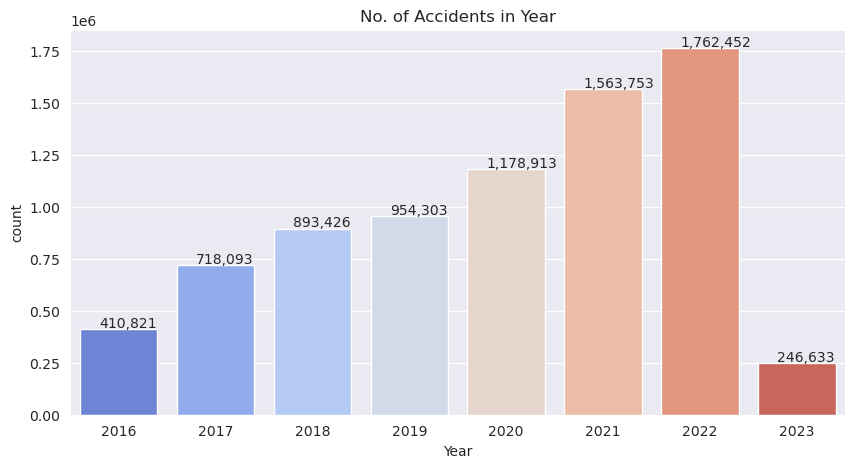

In [65]:
fig, ax = plt.subplots(figsize = (10,5))
cp = sns.countplot(x="Year", data=df, orient = 'v', palette = "coolwarm")
cp.set_title("No. of Accidents in Year")
for i in ax.patches:
    count = '{:,.0f}'.format(i.get_height())
    x = i.get_x()+i.get_width()-0.60
    y = i.get_height()+10000
    ax.annotate(count, (x, y))
plt.show()

So the trend is increasing as 2023 has data till march only

### **5. Which timezone in US had most accidents?**

In [66]:
print(df.Timezone.value_counts())

US/Eastern     3580167
US/Pacific     2062984
US/Central     1645616
US/Mountain     431819
Name: Timezone, dtype: int64


Eastern Timezone has most number of accidents

### **6. How many accidents happened near to traffic signal?**

In [67]:
df.Traffic_Signal.sum()

1143772

Total 1143772 accidents happened near traffic signal

### **7. Compare severity of accidents & find how many accidents impacted most on traffic?**

Severity column shows the severity of the accident, a number between 1 and 4, where 1 indicates the least impact on traffic (i.e., short delay) and 4 indicates the highest impact

               ID
Severity         
1           67366
2         6156981
3         1299337
4          204710


<Axes: ylabel='Severity'>

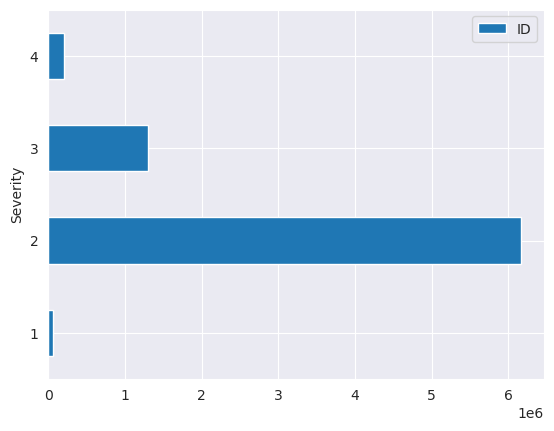

In [68]:
print(df.groupby('Severity')[['ID']].count())
df.groupby('Severity')[['ID']].count().plot(kind='barh')

Most of the accidents(6156981) were with severity level of 2.

204710 accidents had highest severity (severity 4) i.e. their impact on traffic was highest.

## Summary and Conclusions:

Insights:

Here are the insights presented using different and simpler words while preserving the original meaning:

1. Only a small percentage (less than 1%) of cities experienced over 1000 accidents between February 2016 and March 2023.

2. The majority of cities had between 10 and 100 accidents during that period.

3. The distribution of accidents by cities follows a pattern of exponentially decreasing occurrences.

4. The hypothesis that weekdays see more accidents during morning and evening rush hours is supported by the data. Most accidents occur between 7am to 8 am and 3pm to 5pm( time people go to office and return from work)

5. However, on weekends, the distribution of accidents is different compared to working days. The majority of accidents on weekends happened between 12 pm and 4 pm.

6. Across working weekdays, the number of accidents is roughly the same on each day.

7. The majority of accidents occurred in fair weather conditions.

8. The number of accidents showed a uniform increase (approximately) with humidity up to 80%. However, there was no clear relationship between humidity and the number of accidents above 80%.

9. The state of California (CA), along with cities like Los Angeles and Houston, had the highest number of accidents.

10. The eastern timezone in the US had the highest number of accidents.

11. The number of accidents increased from 2016 to 2022, with the year 2022 having the highest number of accidents and 2023 numbers are less as data available is of 3 months only.


**In conclusion, based on the analysis, it can be inferred that the majority of accidents occur in cities where proper traffic management mechanisms such as traffic signals and speed bumps are lacking, especially in less congested areas away from main intersections. This highlights the importance of implementing effective traffic control measures to reduce the occurrence of accidents**.

**The US-Accidents dataset can be used for numerous applications, such as real-time car accident prediction, studying car accident hotspot locations, casualty analysis, extracting cause and effect rules to predict car accidents, and studying the impact of precipitation or other environmental stimuli on accident occurrence. The most recent release of the dataset can also be useful for studying the impact of COVID-19 on traffic behavior and accidents.**

## **Citation**

Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, and Rajiv Ramnath. “A Countrywide Traffic Accident Dataset.”, 2019.

Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, Radu Teodorescu, and Rajiv Ramnath. "Accident Risk Prediction based on Heterogeneous Sparse Data: New Dataset and Insights." In proceedings of the 27th ACM SIGSPATIAL International Conference on Advances in Geographic Information Systems, ACM, 2019.